# Phase 1 - Week 1 - Day 4 AM - Linear Regression

# A. Linear Regression Method

You are probably familiar with the simplest form of a linear regression model (i.e., fitting a straight line to data) but such models can be extended to model more complicated data behavior.

We will start with the most familiar linear regression, a straight-line fit to data.
A straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept*.

## A.1 - Dataset

For this section, we will use dataset of [Pizza Franchise](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/frames/frame.html). In the following data you will have

`X` : annual franchise fee ($1000)

`y` : start up cost ($1000)

Our goal is to predict how much it will cost to start a pizza franchise based on their annual costs.

In [1]:
# Data Loading

import pandas as pd

pizza_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4AM%20-%20Linear%20Regression%20-%20Pizza%20Franchise.csv', sep=';')
pizza_df.head(5)

,annual franchise fee,start up cost
0,1000,1050
1,1125,1150
2,1087,1213
3,1070,1275
4,1100,1300


In [2]:
# Split Dataset

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(pizza_df['annual franchise fee'],
                                                    pizza_df['start up cost'],
                                                    test_size=0.3,
                                                    random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (25,)
Test size  :  (11,)


In [3]:
# Reshape the train-set (because the dataset has a single feature )

X_train = X_train.to_numpy().reshape(-1, 1)
y_train = y_train.to_numpy().reshape(-1, 1)

X_test = X_test.to_numpy().reshape(-1, 1)
y_test = y_test.to_numpy().reshape(-1, 1)

X_train

array([[ 850],
       [ 900],
       [1250],
       [ 700],
       [1100],
       [1200],
       [1150],
       [1330],
       [1175],
       [1150],
       [1225],
       [1125],
       [1175],
       [1180],
       [1080],
       [1250],
       [1080],
       [1100],
       [1325],
       [1090],
       [1200],
       [1350],
       [ 900],
       [1070],
       [1000]])

In [4]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## A.2 - Method 1 : Ordinary Least Squares (OLS)

Remember that a straight-line fit is a model of the form
$$
y = ax + b
$$
where $a$ is commonly known as the *slope*, and $b$ is commonly known as the *intercept* is also equal to

$$
y = ax + (b*1)
$$

So, we will add `1` (a constant) in purpose to multiply it with the intercept we get later

In [5]:
# Adds a constant to multiply by the intercept

import numpy as np

X_train_with_constant = np.c_[np.ones((len(X_train), 1)), X_train]
X_train_with_constant

array([[ 1.        , -1.76700854],
       [ 1.        , -1.4375886 ],
       [ 1.        ,  0.86835095],
       [ 1.        , -2.75526835],
       [ 1.        , -0.11990886],
       [ 1.        ,  0.53893102],
       [ 1.        ,  0.20951108],
       [ 1.        ,  1.39542285],
       [ 1.        ,  0.37422105],
       [ 1.        ,  0.20951108],
       [ 1.        ,  0.70364098],
       [ 1.        ,  0.04480111],
       [ 1.        ,  0.37422105],
       [ 1.        ,  0.40716304],
       [ 1.        , -0.25167683],
       [ 1.        ,  0.86835095],
       [ 1.        , -0.25167683],
       [ 1.        , -0.11990886],
       [ 1.        ,  1.36248086],
       [ 1.        , -0.18579284],
       [ 1.        ,  0.53893102],
       [ 1.        ,  1.52719083],
       [ 1.        , -1.4375886 ],
       [ 1.        , -0.31756082],
       [ 1.        , -0.77874873]])

To find the coefficient and the intercepet, we can use Ordinary Least Squares with formula

$$
estimator = (X^T X)^{- 1} X^T y
$$

In [6]:
# Let's Find Intercept and Coeeficient

estimator = np.linalg.inv(X_train_with_constant.T.dot(X_train_with_constant)).dot(X_train_with_constant.T).dot(y_train)

print(estimator)
print('Intercept   : ', estimator[0])
print('Coefficient : ', estimator[1])

[[1293.2       ]
 [  65.81652216]]
Intercept   :  [1293.2]
Coefficient :  [65.81652216]


Conclusion, based on the result of Ordinary Least Squares the formula will be :

```
start up cost = (65.81652216 * annual franchise fee) + 1293.2
```

## A.3 - Method 2 : Covariance and Variance

In [7]:
# Calculate the mean
def get_mean(arr):
    return np.sum(arr)/len(arr)

# Calculate the variance
def get_variance(arr, mean):
    return np.sum((arr-mean)**2)/len(arr)

# Calculate the covariance
def get_covariance(arr_x, mean_x, arr_y, mean_y):
    final_arr = (arr_x - mean_x)*(arr_y - mean_y)
    return np.sum(final_arr)/len(arr_x)

# Get the coefficients and the intercept
# coefficient = cov(x, y) / var(x)
# intercept = y - m*x
def get_estimators(x, y):
    x_mean = get_mean(x)
    y_mean = get_mean(y)
    coefficient = get_covariance(x, x_mean, y, y_mean)/get_variance(x, x_mean)
    intercept = y_mean - x_mean * coefficient

    return coefficient, intercept

In [8]:
# Get the estimators

coefficient, intercept = get_estimators(X_train, y_train)
print('Intercept   : ', intercept)
print('Coefficient : ', coefficient)

Intercept   :  1293.2
Coefficient :  65.81652215546308


Conclusion, based on the result of using covariance and variance, the formula will be :

```
start up cost = (65.81652216 * annual franchise fee) + 1293.2
```

This formula is the same formula as method 1 using Ordinary Least Squares (OLS).

## A.4 - Method 3 : Scikit-Learn

In [9]:
# Find the coefficents and the intercept using Scikit-Learn (Linear Regression)

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

print('Intercept   : ', lin_reg.intercept_)
print('Coefficient : ', lin_reg.coef_)

Intercept   :  [1293.2]
Coefficient :  [[65.81652216]]


The result still same with 2 previous methods.

## A.5 - Method 4 : Gradient Descent

In [10]:
# Find the coefficents and the intercept using Scikit-Learn (Gradien Descent)

from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X_train, y_train.ravel())

print('Intercept   : ', sgd_reg.intercept_)
print('Coefficient : ', sgd_reg.coef_)

Intercept   :  [1292.01092703]
Coefficient :  [59.03280237]


Because Gradient Descend has initialization random, you need to define hyperparameter `random_state`. Otherwise, the result will changing everytime you run the code.

**CONCLUSION :**

You can see that the cofficents and the intercept is different from 3 previous methods due to randomness at the beginning of the process.

| Method | Coefficent | Intercept |
| --- | --- | --- |
| Ordinary Least Squares (manual) | 65.81652216 | 1293.2 |
| Covariance and Variance | 65.81652216 | 1293.2 |
| Ordinary Least Squares (Scikit-Learn) | 65.81652216 | 1293.2 |
| Gradient Descent (Scikit-Learn) | 59.03280237 | 1292.01092703 |

# B. Multiple Linear Regression

## B.1 - Import Library

In [11]:
# Import Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## B.2 - Data Loading

For this tutorial, we will use movie attributes to predict its rating. The following is the information of the dataset.

| Column | Description |
| --- | --- |
| Avg_age_actors | The average age of the actors |
| Marketing_expense | Marketing cost of the film (USD) |
| Wardrobe_expense | Production cost of the film (USD) |
| Budget | Total budget to produce the film (USD) |
| Lead_actor_rating | Rating of the main actors in the film (scale : 0 - 10) |
| Lead_actress_rating | Rating of the main actress in the film (scale : 0 - 10) |
| Director_rating | Rating of a director (scale : 0 - 10) |
| Producer_rating | Rating of a producer (scale : 0 - 10) |
| Movie_length | Duration of the movie (in minute) |
| Trailer_views | The number of viewers who watched the trailer on YouTube |
| Twitter_hastags | The number of tweets that contain hashtags related to the film |
| Total_cinemas | The number of movie theatres showing the film worldwide |
| Movie_rating | Rating given to the film by the audience (scale : 0 - 10) |

In [12]:
# Data Loading

movie_df = pd.read_csv('https://raw.githubusercontent.com/FTDS-learning-materials/phase-1/master/w1/P1W1D4AM%20-%20Linear%20Regression%20-%20Movie%20Ratings.csv')
movie_df

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas,Movie_rating
0,23,20126,59620,36524125,7.825,8.095,7.910,7.995,138.7,527367,22384,49400,7.94
1,42,20546,69140,35668655,7.505,7.650,7.440,7.470,152.4,494055,24346,46200,7.44
2,38,20546,69140,39912675,7.485,7.570,7.495,7.515,134.6,547051,202240,45800,7.44
3,45,20647,59360,38873890,6.895,7.035,6.920,7.020,119.3,516279,22534,47200,8.26
4,55,21381,59360,39701585,6.920,7.070,6.815,7.070,127.7,531448,22579,39500,8.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,27,21253,78860,36624115,8.680,8.775,8.620,8.970,142.6,492480,24358,56100,6.80
502,20,20905,78860,33996600,8.780,8.945,8.770,8.930,150.2,482875,26330,60000,7.80
503,31,21215,78860,38751680,8.830,8.970,8.855,9.010,164.5,532239,24382,57600,7.80
504,47,22192,78860,37740670,8.730,8.845,8.800,8.845,162.8,496077,30352,60700,6.80


In [13]:
# Check Info Dataset

movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Avg_age_actors       506 non-null    int64  
 1   Marketing_expense    506 non-null    int64  
 2   Wardrobe_expense     506 non-null    int64  
 3   Budget               506 non-null    int64  
 4   Lead_actor_rating    506 non-null    float64
 5   Lead_actrees_rating  506 non-null    float64
 6   Director_rating      506 non-null    float64
 7   Producer_rating      506 non-null    float64
 8   Movie_length         506 non-null    float64
 9   Trailer_views        506 non-null    int64  
 10  Twitter_hastags      506 non-null    int64  
 11  Total_cinemas        506 non-null    int64  
 12  Movie_rating         506 non-null    float64
dtypes: float64(6), int64(7)
memory usage: 51.5 KB


We can see that all columns are in numeric forms and there is no missing values.

In [14]:
# Check the Dataset

movie_df.describe()

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas,Movie_rating
count,506.000000,5.060000e+02,506.000000,5.060000e+02,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,39.181818,9.227046e+04,77273.557312,3.491114e+07,8.014002,8.185613,8.019664,8.190514,142.074901,449860.715415,26083.217391,54504.347826,7.810870
std,12.513697,1.720309e+05,13720.705882,3.903038e+06,1.054266,1.054290,1.059899,1.049601,28.148861,68917.763145,10477.905580,10633.288887,0.659699
min,3.000000,2.012600e+04,55920.000000,1.978136e+07,3.840000,4.035000,3.840000,4.030000,76.400000,212912.000000,20115.000000,33300.000000,6.600000
25%,28.000000,2.164100e+04,65380.000000,3.269395e+07,7.316250,7.503750,7.296250,7.507500,118.525000,409128.000000,22379.500000,46500.000000,7.200000
50%,39.000000,2.513000e+04,74380.000000,3.448822e+07,8.307500,8.495000,8.312500,8.465000,151.000000,462460.000000,25440.000000,53550.000000,7.960000
75%,50.000000,9.354125e+04,91200.000000,3.679354e+07,8.865000,9.030000,8.883750,9.030000,167.575000,500247.500000,28341.250000,61475.000000,8.260000
max,60.000000,1.799524e+06,110480.000000,4.877290e+07,9.435000,9.540000,9.425000,9.635000,173.500000,567784.000000,202240.000000,86800.000000,9.400000


In [15]:
# Splitting between `X` and `y`

X = movie_df.drop(['Movie_rating'], axis=1)
y = movie_df['Movie_rating']
X

,Avg_age_actors,Marketing_expense,Wardrobe_expense,Budget,Lead_actor_rating,Lead_actrees_rating,Director_rating,Producer_rating,Movie_length,Trailer_views,Twitter_hastags,Total_cinemas
0,23,20126,59620,36524125,7.825,8.095,7.910,7.995,138.7,527367,22384,49400
1,42,20546,69140,35668655,7.505,7.650,7.440,7.470,152.4,494055,24346,46200
2,38,20546,69140,39912675,7.485,7.570,7.495,7.515,134.6,547051,202240,45800
3,45,20647,59360,38873890,6.895,7.035,6.920,7.020,119.3,516279,22534,47200
4,55,21381,59360,39701585,6.920,7.070,6.815,7.070,127.7,531448,22579,39500
...,...,...,...,...,...,...,...,...,...,...,...,...
501,27,21253,78860,36624115,8.680,8.775,8.620,8.970,142.6,492480,24358,56100
502,20,20905,78860,33996600,8.780,8.945,8.770,8.930,150.2,482875,26330,60000
503,31,21215,78860,38751680,8.830,8.970,8.855,9.010,164.5,532239,24382,57600
504,47,22192,78860,37740670,8.730,8.845,8.800,8.845,162.8,496077,30352,60700


## B.3 - Assumption 1 : Linear Relationship

The relations between the independent variables and dependent variable must be linear. A linear relationship suggests that a change in response y due to one unit change in X is constant, regardless of the value of X.

If your relationships are not linear, the regression algorithm would fail to capture the trend mathematically, thus resulting in an inefficient model. Also, this will result in erroneous predictions on an unseen data set. You should not use a linear model, but rather a non linear model such as polynomial model.

**How to check** : by making a scatter plot for each independent variable with the dependent variable. When you see curves, parabolas, exponentials, or basically any shape that is recognizable as not a straight line, is not linear relationship.



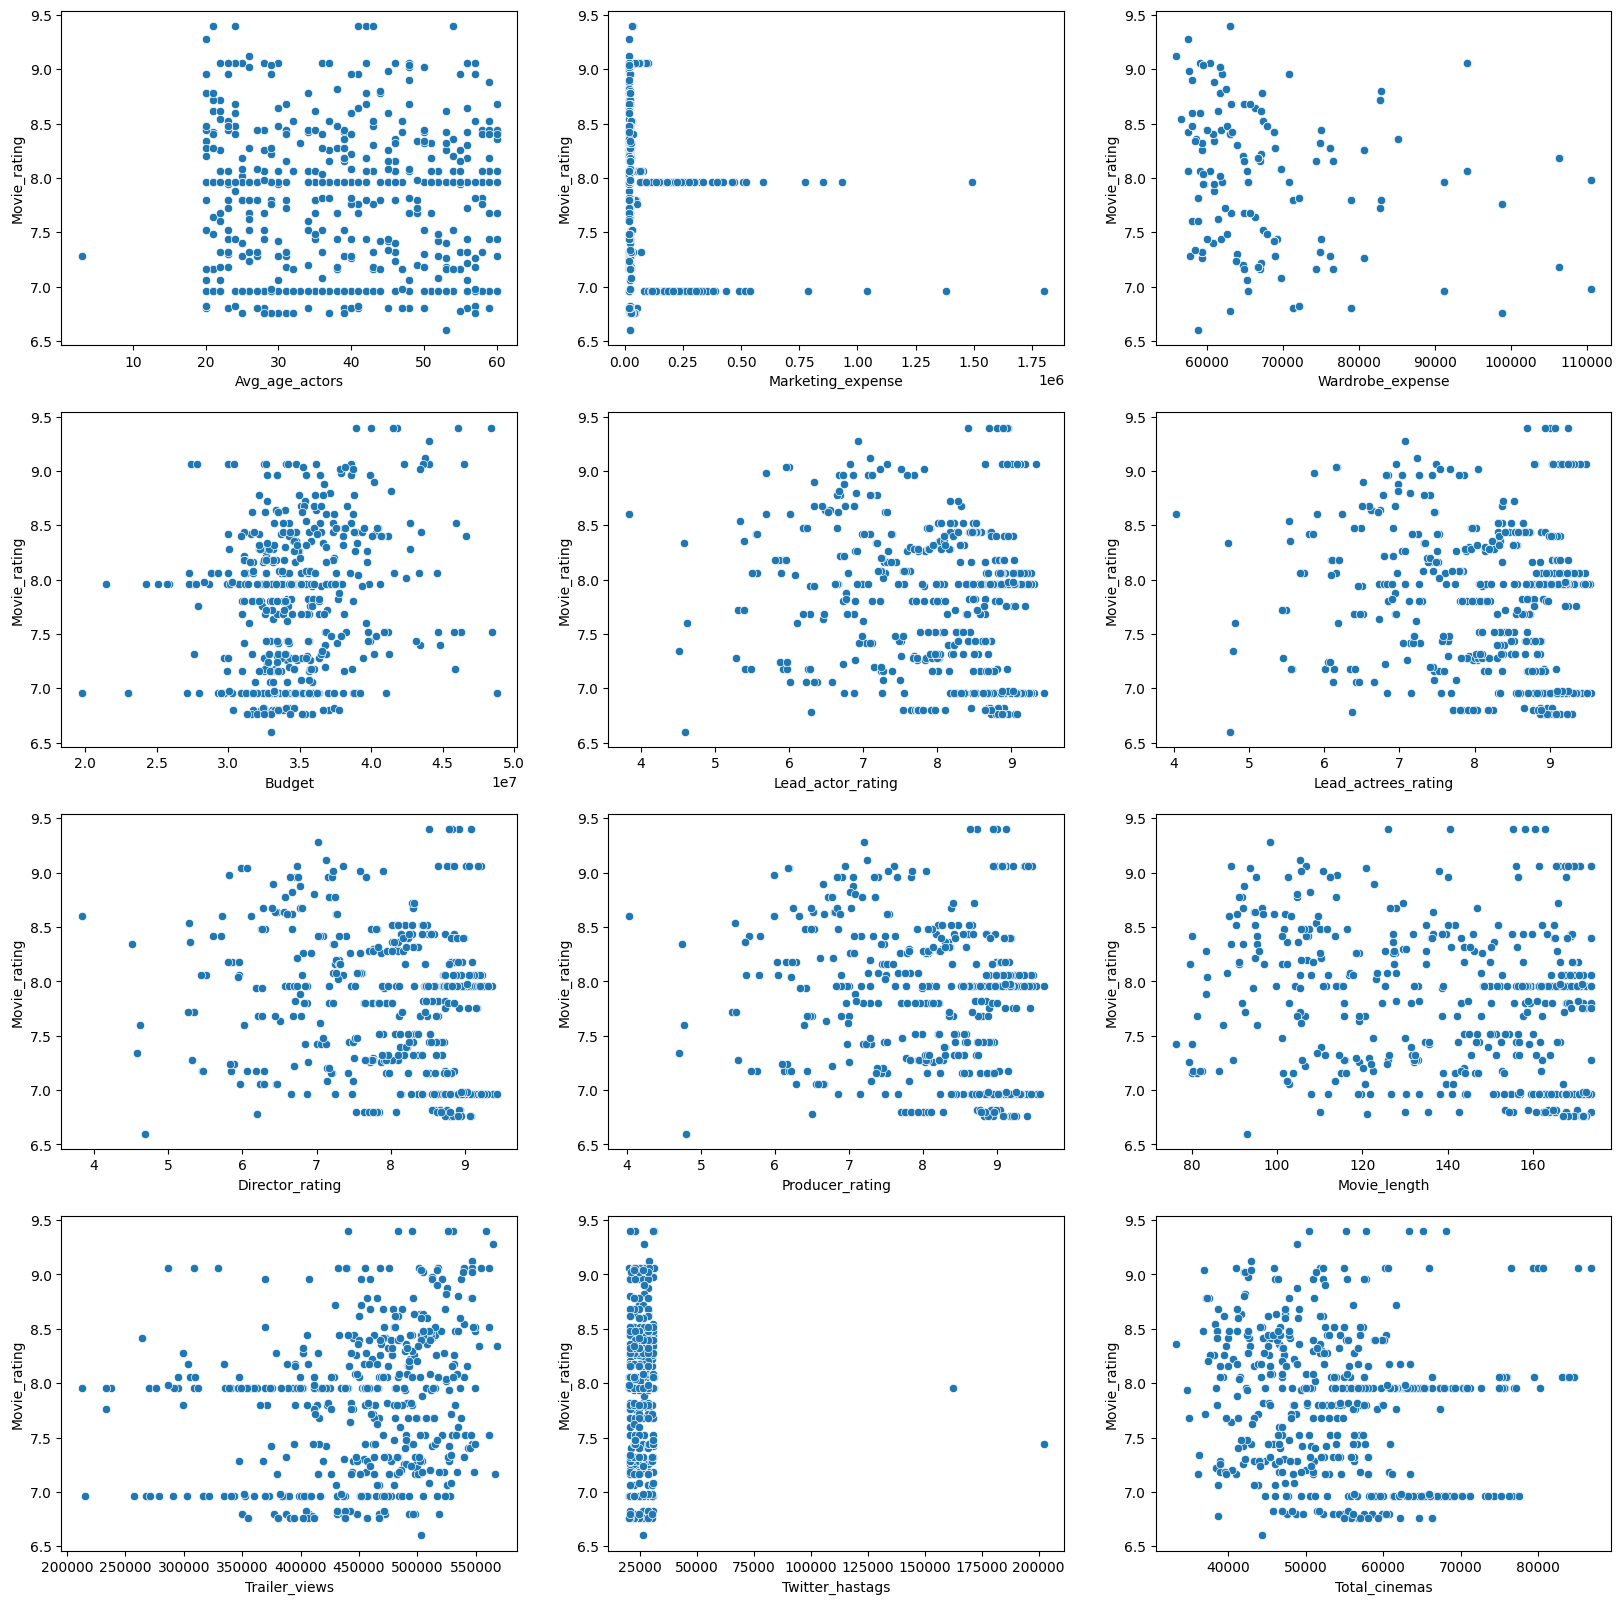

In [16]:
# Check the relationship between independent variables and dependent variable

fig = plt.figure(figsize=(20, 20))
cols = X.columns.tolist()
num_rows = 4
num_cols = 3

for index in range(1, num_rows*num_cols + 1):
  fig.add_subplot(num_rows, num_cols, index)
  sns.scatterplot(data=movie_df, x=cols[index-1], y='Movie_rating')
plt.show()

**NOTES**

Based on the scatter plot, **there is no independent variable that has a linear relationship with the dependent variable**. At this point, we violate the first assumption. Trying to build a model with Linear Regression to solve this problem will not be the best solution.

Therefore, we will build a Linear Regression model and check all the assumptions so you can gain a deeper understanding of this algorithm.

## B.4 - Assumption 2 : No or Little Multicollinearity

Multicollinearity is the phenomenon when a number of the independent variables are strongly correlated.

The correlation between each independent variables (features) and the dependent variable (target), must be strong. But, between independent variables must have no or little correlation. The reason is that if two independent variables are correlated, they explain the same information. The model will not be able to know which of the two variables is actually responsible for a change in the dependent variable.

**How to check :** by using the Variance Inflation Factor (VIF).  
* A VIF of 1 is the best you can have as this indicates that there is no multicollinearity for this variable.
* A VIF of higher than 5 or 10 indicates that there is a multicollinearity in your model.
* Also, you can use a domain knowledge to check the correlation.


In [17]:
# Create a function to calculate Variance Inflation Factor

from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [18]:
# Check Multicolinearity in X

calc_vif(X)

,variables,VIF
0,Avg_age_actors,10.627252
1,Marketing_expense,1.708425
2,Wardrobe_expense,83.484918
3,Budget,125.034332
4,Lead_actor_rating,18504.185640
5,Lead_actrees_rating,21401.772450
6,Director_rating,19015.407592
7,Producer_rating,5887.895248
8,Movie_length,75.204209
9,Trailer_views,88.695611


Based on the table above, there are several columns that have VIF value of more than 10 such as `Avg_age_actors`, `Wardrobe_expense`, `Budget`, `Lead_actor_rating`, `Lead_actrees_rating`, `Director_rating`, `Producer_rating`, `Movie_length`, `Trailer_views`, and `Total_cinemas`.

**Solution :**
1. You can try to reduce 1-on-1 of these columns and recalculate the VIF scores. This step is repeated until all VIF scores less than 10.

2. Using some domain knowledge to remove features. For example, feature `Wardrobe_expense` can be removed because this feature is part of `Budget`.

3. PCA. You will learn this technique in the later weeks.

In [19]:
# Drop column `Total_cinemas` and recheck multicolinearity in X

X = X.drop(['Total_cinemas'], axis=1)
calc_vif(X)

,variables,VIF
0,Avg_age_actors,10.593792
1,Marketing_expense,1.703329
2,Wardrobe_expense,73.840722
3,Budget,124.891339
4,Lead_actor_rating,18467.751345
5,Lead_actrees_rating,21381.635289
6,Director_rating,18961.488683
7,Producer_rating,5883.559802
8,Movie_length,72.448345
9,Trailer_views,88.214494


As you can see, when a column is deleted, the VIF score will change.

In [20]:
# Drop column `Trailer_views` and recheck multicolinearity in X

X = X.drop(['Trailer_views'], axis=1)
calc_vif(X)

,variables,VIF
0,Avg_age_actors,10.348762
1,Marketing_expense,1.577333
2,Wardrobe_expense,73.837644
3,Budget,43.040160
4,Lead_actor_rating,18454.690393
5,Lead_actrees_rating,21171.093555
6,Director_rating,18766.191394
7,Producer_rating,5851.992822
8,Movie_length,64.612351
9,Twitter_hastags,7.138204


Based on [filmdaft.com](https://filmdaft.com/the-5-key-ingredients-to-a-good-movie/), you found out that the following are the ingredients to make a good movie :

1. It all starts with good writing
2. Directing with a vision
3. Actors that bring the story to life
4. Cinematography that awes and inspires
5. Production value that supports the scope of the film

Based on the information above, you decide that you will include all features except the `Movie_length` feature even those features have high VIF scores.

In [21]:
# Drop column `Movie_length` and recheck multicolinearity in X

X = X.drop(['Movie_length'], axis=1)
calc_vif(X)

,variables,VIF
0,Avg_age_actors,10.322911
1,Marketing_expense,1.571016
2,Wardrobe_expense,70.961746
3,Budget,42.455587
4,Lead_actor_rating,18448.277727
5,Lead_actrees_rating,21164.574429
6,Director_rating,18752.814508
7,Producer_rating,5841.703920
8,Twitter_hastags,7.138201


**NOTES**

Based on final VIF scores, several independent variables have more than 10. We also violate the second assumption.

---

**[IMPORTANT NOTES]**

**VIF is not Feature Selection.** VIF is used to gain understanding of your dataset before training the model. You can still combine VIF with Feature Selection techniques such as Spearman, Pearson, ANOVA, Chi-square, etc.


## B.5 - Splitting Dataset

In [22]:
# Splitting Dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Train size : ', X_train.shape)
print('Test size  : ', X_test.shape)

Train size :  (354, 9)
Test size  :  (152, 9)


## B.6 - Feature Scaling

In [23]:
# Feature Scaling

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled

array([[ 0.35316618, -0.2073549 ,  1.54801583, ...,  1.06920955,
         1.1990716 , -0.18038252],
       [ 0.10657678, -0.38886483, -0.58974728, ..., -0.09313587,
        -0.15810074, -0.00511985],
       [-0.14001263, -0.33573237,  1.54801583, ...,  0.77500594,
         0.84649658, -0.33779436],
       ...,
       [-0.87978085, -0.38450106, -0.15303077, ...,  0.48562534,
         0.37317669,  0.31270602],
       [ 0.43536265, -0.37512016, -0.59690657, ..., -0.8792865 ,
        -0.9453573 , -0.17746148],
       [-0.05781616, -0.38592169, -1.00641779, ...,  0.57726253,
         0.56153869, -0.1690229 ]])

## B.7 - Model Training

In [24]:
# Training using Linear Regression

from sklearn.linear_model import LinearRegression

model_linreg = LinearRegression()
model_linreg.fit(X_train_scaled, y_train)

LinearRegression()

In [25]:
# Check coefficients and intercept

coefficients = model_linreg.coef_
intercept = model_linreg.intercept_

params = {
    'feature': X_train.columns.tolist(),
    'coefficient': model_linreg.coef_.tolist()
}

print('Intercept : ', intercept)
pd.DataFrame(params)

Intercept :  7.799661016949151


,feature,coefficient
0,Avg_age_actors,-0.021007
1,Marketing_expense,-0.051906
2,Wardrobe_expense,-0.138055
3,Budget,0.112979
4,Lead_actor_rating,-0.326980
5,Lead_actrees_rating,0.316007
6,Director_rating,0.200400
7,Producer_rating,-0.154842
8,Twitter_hastags,-0.017783


## B.8 - Model Evaluation

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error, however MAE won't punish large error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world (the issue with MSE : different units than y, it reports units of y squared.)
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.
- **R2** R-squared evaluates the scatter of the data points around the fitted regression line, determine how well the model fits the data.

In [26]:
# Predict Train-Set and Test-Set

y_pred_train = model_linreg.predict(X_train_scaled)
y_pred_test = model_linreg.predict(X_test_scaled)

In [27]:
# Model evaluation using different metrics

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print('MAE - Train Set  : ', mean_absolute_error(y_train, y_pred_train))
print('MAE - Test Set   : ', mean_absolute_error(y_test, y_pred_test))
print('')

print('MSE - Train Set  : ', mean_squared_error(y_train, y_pred_train))
print('MSE - Test Set   : ', mean_squared_error(y_test, y_pred_test))
print('')

print('RMSE - Train Set : ', mean_squared_error(y_train, y_pred_train, squared=False))
print('RMSE - Test Set  : ', mean_squared_error(y_test, y_pred_test, squared=False))
print('')

print('R2 Score - Train Set : ', r2_score(y_train, y_pred_train))
print('R2 Score - Test Set  : ', r2_score(y_test, y_pred_test))
print('')

MAE - Train Set  :  0.5387695085341624
MAE - Test Set   :  0.5616304273684009

MSE - Train Set  :  0.38672274584234295
MSE - Test Set   :  0.41255655658485324

RMSE - Train Set :  0.6218703609614652
RMSE - Test Set  :  0.6423056566657757

R2 Score - Train Set :  0.10965676397663549
R2 Score - Test Set  :  0.047974466059599874



**For this case, you should consider MSE and RMSE rather than MAE.**

This is because the slightest difference in film ratings can influence the audience.
Audiences are more likely to be interested in watching a film with a higher rating compared to other films, even if the difference is minor.

## B.9 - Assumption 3 : Multivariate Normality

Once a model is created, you can predict observations and compare the actual results (y) with the predicted results (ŷ). The difference between the actual results and the predicted results is called the residual. The residuals should follow a normal distribution.

**How to check :** This can be easily checked by plotting QQ plot. Ideally, it should have been a straight line. What you need to look at in QQ Plots is whether the points are on the straight line going from bottom left to top right. If you see any type of an S form, an exponential curve, or another shape than a straight line, this means you have a problem. Probably you are missing some variables, or maybe your relationships are not actually linear!


In [28]:
# Get residuals

y_test_residuals = y_test - y_pred_test
y_test_residuals

329    0.714633
371    0.273431
219    0.883338
403   -0.462269
78     0.546525
         ...   
4      0.212808
428    0.320335
385   -0.485373
308   -0.598443
5     -0.708792
Name: Movie_rating, Length: 152, dtype: float64

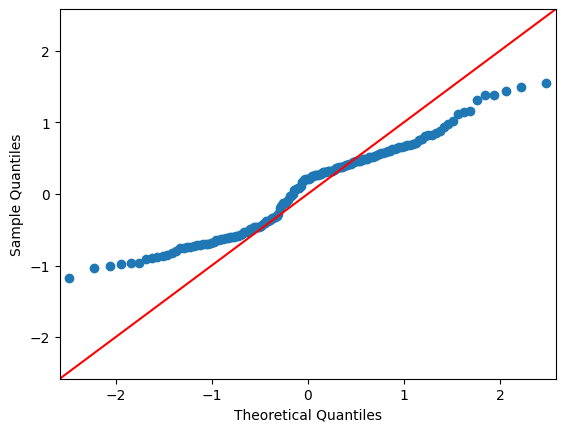

In [29]:
# Display QQ plot

import statsmodels.api as sm

sm.qqplot(y_test_residuals, line ='45')
plt.show()

**NOTES**

Since the line of the QQ plot is shaped like the letter S, this means that this assumption is also violated.

## B.10 - Assumption 4 : No Auto-Correlation

No Auto-Correlation means that the residuals are independent. This is mostly relevant when working with time series data. Ideally, we don’t want there to be a pattern among consecutive residuals. For example, residuals shouldn’t steadily grow larger as time goes on.

**How to check :** Durbin-Watson test could help us analyze if there is any auto-correlation between the residues. The Durbin-Watson test statistic always ranges from 0 to 4 where :
* d = 2 indicates no autocorrelation
* d < 2 indicates positive serial correlation
* d > 2 indicates negative serial correlation
* In general, if 1.5 < d < 2.5  then autocorrelation is likely not a cause for concern. Otherwise, there is potentially a serious autocorrelation problem.


In [30]:
# Perform Durbin-Watson test

from statsmodels.stats.stattools import durbin_watson

durbin_watson(y_test_residuals)

2.0977205823556564

The test statistic is `2.098`. Since this is within the rang of `1.5` and `2.5`, we can consider autocorrelation not to be problematic in this regression model.

## B.11 - Assumption 5 : Homoscedasticity

Homoscedasticity in a model means that the error is constant along the values of the dependent variable. Homoscedasticity means a constant error, you are looking for a constant deviation of the points from the zero-line. If you violate homoscedasticity, this means you have heteroscedasticity. Generally, non-constant variance arises in presence of outliers or extreme leverage values.

**How to check :** make a scatterplot with the residuals against the dependent variable. Plotting the scatter plots of the errors with the fit line will show if residues are forming any pattern with the line. If the scatter plot doesn’t form any pattern and is randomly distributed around the fit line than the residues are homoscedastic.

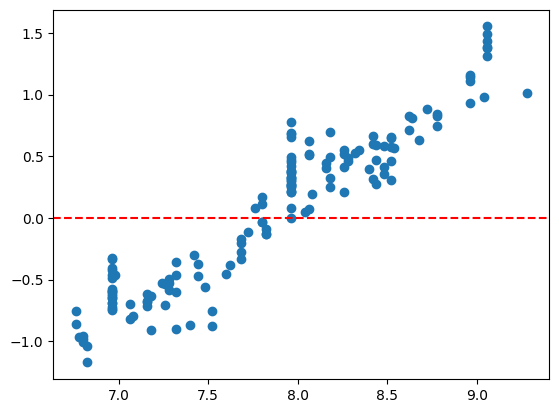

In [31]:
# Check homoscedasticioty

plt.scatter(y_test, y_test_residuals)
plt.axhline(y = 0, color = 'r', linestyle = '--')
plt.show()

**NOTES**

We can see that the `y_test_residuals` and `y_test` have a linear pattern that tends to go up. This means there is heteroscedasticity. This assumption is also violated.

## B.12 - Conclusion

In the case of predicting the movie ratings, we have built a Machine Learning model using Linear Regression. This model has several assumptions that need to be met for its performance to be good and valid. From the beginning, no linear relationship was found between the independent variables and the dependent variable, and we have proven this until the model evaluation phase, where only 1 out of 5 assumptions is fulfilled. Here are some suggestions that can be implemented for the next model creation:

1. Handle outliers. Linear Regression is highly affected by outliers in the dataset.

2. Use regression algorithms that do not rely on linear relationships, such as Polynomial Regression.

3. To reduce VIF values, consider performing PCA (Principal Component Analysis).

4. Conduct Feature Selection to assess the correlation between each independent variable and the dependent variable.